### Imports

In [1]:
from api import *
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import data

In [2]:
# Import these reports
clean_birmingham_report_df = pd.read_feather('image_time_traffic_reports/clean_birmingham_report_df')
clean_manc_report_df = pd.read_feather('image_time_traffic_reports/clean_manc_report_df')
clean_cam_report_df = pd.read_feather('image_time_traffic_reports/clean_cam_report_df')
clean_thorpe_report_df = pd.read_feather('image_time_traffic_reports/clean_thorpe_report_df')
clean_epping_report_df = pd.read_feather('image_time_traffic_reports/clean_epping_report_df')
clean_bristol_df = pd.read_feather('image_time_traffic_reports/clean_bristol_df')

import copy
road_lengths = pd.read_csv('road_lengths_single_lane.csv') 
traffc_data_england = copy.copy(road_lengths)

clean_train_report_df = pd.concat([clean_birmingham_report_df, clean_manc_report_df, clean_cam_report_df, clean_thorpe_report_df, clean_epping_report_df, clean_bristol_df])


sites = []
for x in list(traffc_data_england.sites):
    sites = sites + x.split(', ')
    
filtered_train_report = clean_train_report_df[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume','timestamp']][clean_train_report_df.site_id.isin(sites)]

In [3]:
# For a particular row x in road_lengths get the correspoiding traffic data
def area_report(x):
    sites = x.sites.split(', ')
    day, month, year = x.ddmmyy.split('/')
    hour, minute  = x.time.split(':')
    
    # Get the nearest of the 15 minute intervals to compare to
    min_mod_15 = round((int(minute)+1)/15)
    nearest_minute_interval = 15*min_mod_15 - 1
    time = datetime.datetime(int(year),int(month),int(day), int(hour), int(nearest_minute_interval))
    x_report = filtered_train_report[(filtered_train_report.site_id.isin(sites)) & (filtered_train_report.timestamp == time)]
    return x_report

# Add the reports to the dataframe
traffc_data_england['report'] = traffc_data_england.apply(area_report, axis=1)
# Extract values from the report
traffc_data_england['0-520cm'] = traffc_data_england.apply(lambda x: x.report['0-520cm'].mean(), axis=1)
traffc_data_england['521-660cm'] = traffc_data_england.apply(lambda x: x.report['521-660cm'].mean(), axis=1)
traffc_data_england['661-1160cm'] = traffc_data_england.apply(lambda x: x.report['661-1160cm'].mean(), axis=1)
traffc_data_england['1160+cm'] = traffc_data_england.apply(lambda x: x.report['1160+cm'].mean(), axis=1)
traffc_data_england['total_volume'] = traffc_data_england.apply(lambda x: x.report['total_volume'].mean(), axis=1)
traffc_data_england['avg_mph'] = traffc_data_england.apply(lambda x: x.report.avg_mph.astype(int).mean(), axis=1)

In [4]:
traffc_data_england

,ddmmyy,time,area,focus,length,sites,filename,report,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
0,19/04/2019,12:48,manchester,M60_N_1,1207.090,"17661, 17616, 17597",manchester_M60_N_1,site_name site_id report_date t...,593.000000,78.000000,124.000000,129.000000,924.000000,11.333333
1,19/04/2019,12:48,manchester,M60_N_2,654.677,"17649, 17587",manchester_M60_N_2,site_name site_id report_date t...,374.000000,103.000000,217.000000,225.000000,919.000000,20.000000
2,19/04/2019,12:48,manchester,M60_N_3,635.028,"17559, 17633",manchester_M60_N_3,site_name site_id report_date t...,847.000000,142.500000,130.500000,108.500000,1228.500000,19.500000
3,19/04/2019,12:48,manchester,M60_N_4,1096.200,"17608, 17248",manchester_M60_N_4,site_name site_id report_date t...,909.500000,56.500000,24.500000,31.500000,1022.000000,39.500000
4,19/04/2019,12:48,manchester,M60_N_5,1234.570,"17288, 17850, 17278",manchester_M60_N_5,site_name site_id report_date t...,799.000000,74.500000,25.000000,22.500000,921.000000,72.500000
5,19/04/2019,12:48,manchester,M60_S_1,634.706,"17636, 17666",manchester_M60_S_1,site_name site_id report_date t...,1073.500000,54.500000,43.500000,53.000000,1224.500000,60.000000
6,19/04/2019,12:48,manchester,M60_S_2,914.027,"17618, 17622, 17651",manchester_M60_S_2,site_name site_id report_date t...,1006.333333,70.666667,35.666667,51.333333,1164.000000,61.333333
7,19/04/2019,12:48,manchester,M60_S_3,762.729,17644,manchester_M60_S_3,site_name site_id report_date t...,1375.000000,49.000000,44.000000,76.000000,1544.000000,52.000000
8,19/04/2019,12:48,manchester,M60_S_4,1042.730,"17605, 17571",manchester_M60_S_4,site_name site_id report_date t...,926.000000,65.500000,22.500000,36.000000,1050.000000,59.000000
9,19/04/2019,12:48,manchester,M60_S_5,999.569,"17245, 17285, 17555",manchester_M60_S_5,site_name site_id report_date t...,857.000000,63.333333,17.666667,22.333333,960.333333,67.666667


In [5]:
def predict_traffic_from_detector(data, threshold, pickle_folder):
    
    traffic_data = copy.copy(data)
    # Initially set the column names so they agree with the names in the pickle files
    detections = pd.DataFrame(
       {
           "filename": [],
           "small_car_detections": [],
           "bus_detections": [],
           "pickup_truck_detections": [],
           "utility_truck_detections": [],
           "truck_detections": [],
           "cargo_truck_detections": [],
           "truck_w_box_detections": [],
           "truck_tractor_detections": [],
           "trailer_detections": [],
           "truck_w_flatbed_detections": [],
           "truck_w_liquid_detections": [],
           "all_vehicle_detections": [],

       }
    )

    # Import the predictions the pickle files
    prediction_lists = defaultdict()

    for i, file in enumerate(os.listdir(pickle_folder)):
        with (open(os.path.join(pickle_folder, file), "rb")) as f:
            prediction_list = pickle.load(f)
        filename = file.split('.')[0]
        prediction_lists[filename] = prediction_list
        counts = defaultdict(int)
        for pred in prediction_list:
            if pred.score.value > threshold:
                counts[pred.category.name] +=1

        detections.loc[i] = [filename, 
                     counts["Small Car"],
                     counts["Bus"],
                     counts["Pickup Truck"],
                     counts["Utility Truck"],
                     counts["Truck"],
                     counts["Cargo Truck"],
                     counts["Truck w/Box"],
                     counts["Truck Tractor"],
                     counts["Trailer"],
                     counts["Truck w/Flatbed"],
                     counts["Truck w/Liquid"],
                     sum([x for x in counts.values()])]
        
    # combine the reports    
    def detection_report(x):
        detections_report = detections[detections.filename == x.filename]
        return detections_report
    
    traffic_data['det_report'] = traffic_data.apply(detection_report, axis=1)
    
    # get the detection numbers
    traffic_data['small_car_detections'] = traffic_data.apply(lambda x: x.det_report.small_car_detections.sum(), axis=1)
    traffic_data['bus_detections'] = traffic_data.apply(lambda x: x.det_report.bus_detections.sum(), axis=1)
    traffic_data['pickup_truck_detections'] = traffic_data.apply(lambda x: x.det_report.pickup_truck_detections.sum(), axis=1)
    traffic_data['utility_truck_detections'] = traffic_data.apply(lambda x: x.det_report.utility_truck_detections.sum(), axis=1)
    traffic_data['truck_detections'] = traffic_data.apply(lambda x: x.det_report.truck_detections.sum(), axis=1)
    traffic_data['cargo_truck_detections'] = traffic_data.apply(lambda x: x.det_report.cargo_truck_detections.sum(), axis=1)
    traffic_data['truck_w_box_detections'] = traffic_data.apply(lambda x: x.det_report.truck_w_box_detections.sum(), axis=1)
    traffic_data['truck_tractor_detections'] = traffic_data.apply(lambda x: x.det_report.truck_tractor_detections.sum(), axis=1)
    traffic_data['trailer_detections'] = traffic_data.apply(lambda x: x.det_report.trailer_detections.sum(), axis=1)
    traffic_data['truck_w_flatbed_detections'] = traffic_data.apply(lambda x: x.det_report.truck_w_flatbed_detections.sum(), axis=1)
    traffic_data['truck_w_liquid_detections'] = traffic_data.apply(lambda x: x.det_report.truck_w_liquid_detections.sum(), axis=1)
    traffic_data['all_vehicle_detections'] = traffic_data.apply(lambda x: x.det_report.all_vehicle_detections.sum(), axis=1)

    # Predict the traffic count from these detections via raodlength and avg speed
    traffic_data['length_milles'] = traffic_data.length.apply(lambda x: x/1000 *5/8)
    traffic_data['time_to_cross_hour'] = traffic_data.apply(lambda x : x.length_milles/x.avg_mph , axis=1)
    traffic_data['time_to_cross_min'] = traffic_data.apply(lambda x : x.time_to_cross_hour * 60 , axis=1)

    detection_cols = ['small_car_detections',
     'bus_detections',
     'pickup_truck_detections',
     'utility_truck_detections',
     'truck_detections',
     'cargo_truck_detections',
     'truck_w_box_detections',
     'truck_tractor_detections',
     'trailer_detections',
     'truck_w_flatbed_detections',
     'truck_w_liquid_detections',
     'all_vehicle_detections']

    for col in detection_cols:
        pred_col = col.replace('detections', 'pred')
        traffic_data[pred_col] = traffic_data[col] * 15 / traffic_data['time_to_cross_min']
        
    return traffic_data

In [34]:
pickle_folder = '../inference/inference-WV3/yolov5-low-threshold2/pickles'
traffic_data_yolov5 = predict_traffic_from_detector(traffc_data_england, 0.15, pickle_folder)
traffic_data_yolov5[['filename', 'length', 'avg_mph', 'total_volume', 'all_vehicle_detections', 'length_milles', 'time_to_cross_min', 'all_vehicle_pred']]

,filename,length,avg_mph,total_volume,all_vehicle_detections,length_milles,time_to_cross_min,all_vehicle_pred
0,manchester_M60_N_1,1207.090,11.333333,924.000000,189,0.754431,3.994048,709.806228
1,manchester_M60_N_2,654.677,20.000000,919.000000,136,0.409173,1.227519,1661.888229
2,manchester_M60_N_3,635.028,19.500000,1228.500000,136,0.396893,1.221208,1670.477522
3,manchester_M60_N_4,1096.200,39.500000,1022.000000,43,0.685125,1.040696,619.777413
4,manchester_M60_N_5,1234.570,72.500000,921.000000,38,0.771606,0.638571,892.618483
5,manchester_M60_S_1,634.706,60.000000,1224.500000,20,0.396691,0.396691,756.255652
6,manchester_M60_S_2,914.027,61.333333,1164.000000,22,0.571267,0.558848,590.500427
7,manchester_M60_S_3,762.729,52.000000,1544.000000,29,0.476706,0.550045,790.844455
8,manchester_M60_S_4,1042.730,59.000000,1050.000000,24,0.651706,0.662752,543.189512
9,manchester_M60_S_5,999.569,67.666667,960.333333,23,0.624731,0.553948,622.801761


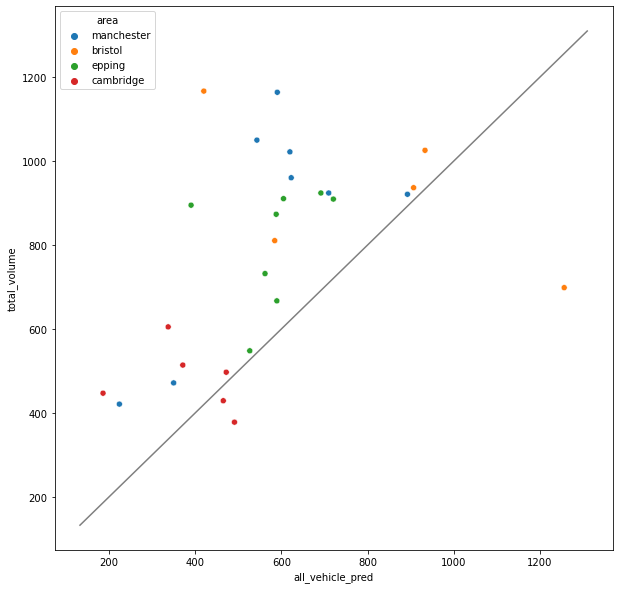

rmse 311.55204754191857, mape. 0.3096001829398927


In [35]:
plot_data = traffic_data_yolov5[traffic_data_yolov5.length > 900]
plot_data = plot_data[plot_data.filename != 'epping_MS5_W_3'].reset_index(drop=True)
#plot_data = traffic_data_yolov5
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='all_vehicle_pred', y='total_volume', hue='area', data=plot_data, ax=ax)
        
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
plt.plot(lims, lims, 'k-', alpha=0.5)
        
plt.show()

mse = ((plot_data.total_volume.values - plot_data.all_vehicle_pred.values)**2).sum()/len(plot_data)
mape = np.absolute(((plot_data.total_volume.values - plot_data.all_vehicle_pred.values) / plot_data.total_volume.values)).mean()

print(f"rmse {mse**0.5}, mape. {mape}")

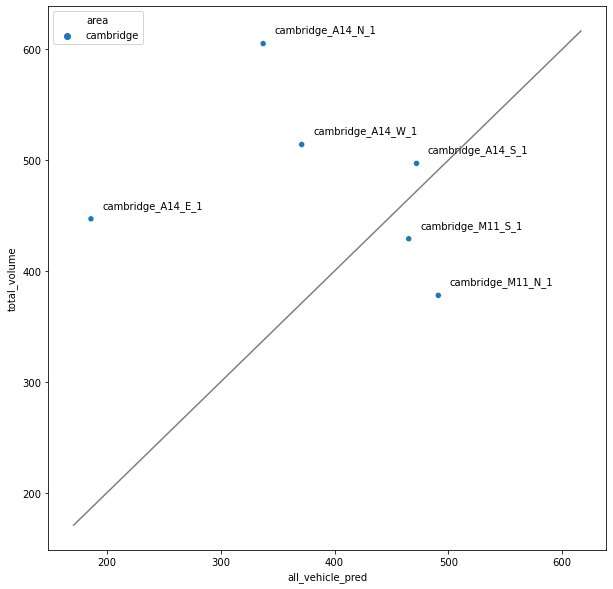

rmse 170.75189790458367, mape. 0.2896918905134193


In [36]:
#plot_data = traffic_data_yolov5[traffic_data_yolov5.length > 900].reset_index(drop=True)
plot_data = traffic_data_yolov5[traffic_data_yolov5.length > 900]
plot_data = plot_data[plot_data.area=='cambridge'].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='all_vehicle_pred', y='total_volume', hue='area', data=plot_data, ax=ax)
for i in range(plot_data.shape[0]):
     plt.text(plot_data.all_vehicle_pred[i]+10, plot_data.total_volume[i]+10, plot_data.filename[i])
        
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
plt.plot(lims, lims, 'k-', alpha=0.5)
        
plt.show()

mse = ((plot_data.total_volume.values - plot_data.all_vehicle_pred.values)**2).sum()/len(plot_data)
mape = np.absolute(((plot_data.total_volume.values - plot_data.all_vehicle_pred.values) / plot_data.total_volume.values)).mean()

print(f"rmse {mse**0.5}, mape. {mape}")

In [13]:
pickle_folder = '../inference/inference-WV3/yolov5-low-threshold/pickles'
predictions = {}
mse_dict = {}
for x in range(5,100,5):
    threshold = x/100
    predictions[threshold] = predict_traffic_from_detector(traffc_data_england, threshold, pickle_folder)
    mse = ((predictions[threshold].total_volume.values - predictions[threshold].all_vehicle_pred.values)**2).sum()/len(predictions[threshold])
    mse_dict[threshold] = mse
    
    

best_threshold = min(mse_dict, key=mse_dict.get)
print(f"the best threshold {best_threshold} gives rmse {mse_dict[best_threshold]**0.5}")    

the best threshold 0.25 gives rmse 439.6783804584062


In [14]:
pickle_folder = '../inference/inference-WV3/tood-low-threshold/pickles'
predictions = {}
mse_dict = {}
for x in range(5,100,5):
    threshold = x/100
    predictions[threshold] = predict_traffic_from_detector(traffc_data_england, threshold, pickle_folder)
    mse = ((predictions[threshold].total_volume.values - predictions[threshold].all_vehicle_pred.values)**2).sum()/len(predictions[threshold])
    mse_dict[threshold] = mse
    
    

best_threshold = min(mse_dict, key=mse_dict.get)
print(f"the best threshold {best_threshold} gives rmse {mse_dict[best_threshold]**0.5}")    

the best threshold 0.15 gives rmse 518.220374967747


In [15]:
np.absolute(((traffic_data_yolov5.total_volume.values - traffic_data_yolov5.all_vehicle_pred.values) / traffic_data_yolov5.all_vehicle_pred.values)).mean()

0.4269617263012816

In [9]:
time = datetime.datetime(2021,11,2,11,29)

In [23]:
sites = [18594
]
site_ids = [str(site) for site in sites]

clean_train_report_df[(clean_train_report_df.timestamp==time) & (clean_train_report_df.site_id.isin(site_ids))]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
1581,A14/0975B,18594,2021-11-02T00:00:00,11:29:00,45,350,14,49,101,65,514,2021-11-02 11:29:00,1.154124,1.994065,2.069512,1.394305,1.264777


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
import copy

In [55]:
im = Image.open('../inference/WV3/cambridge_A14_E_1.tiff')
picke_path = '../inference/inference-WV3/yolov5-low-threshold2/pickles/cambridge_A14_E_1.pickle'
with (open(picke_path, "rb")) as f:
    bboxes = pickle.load(f)

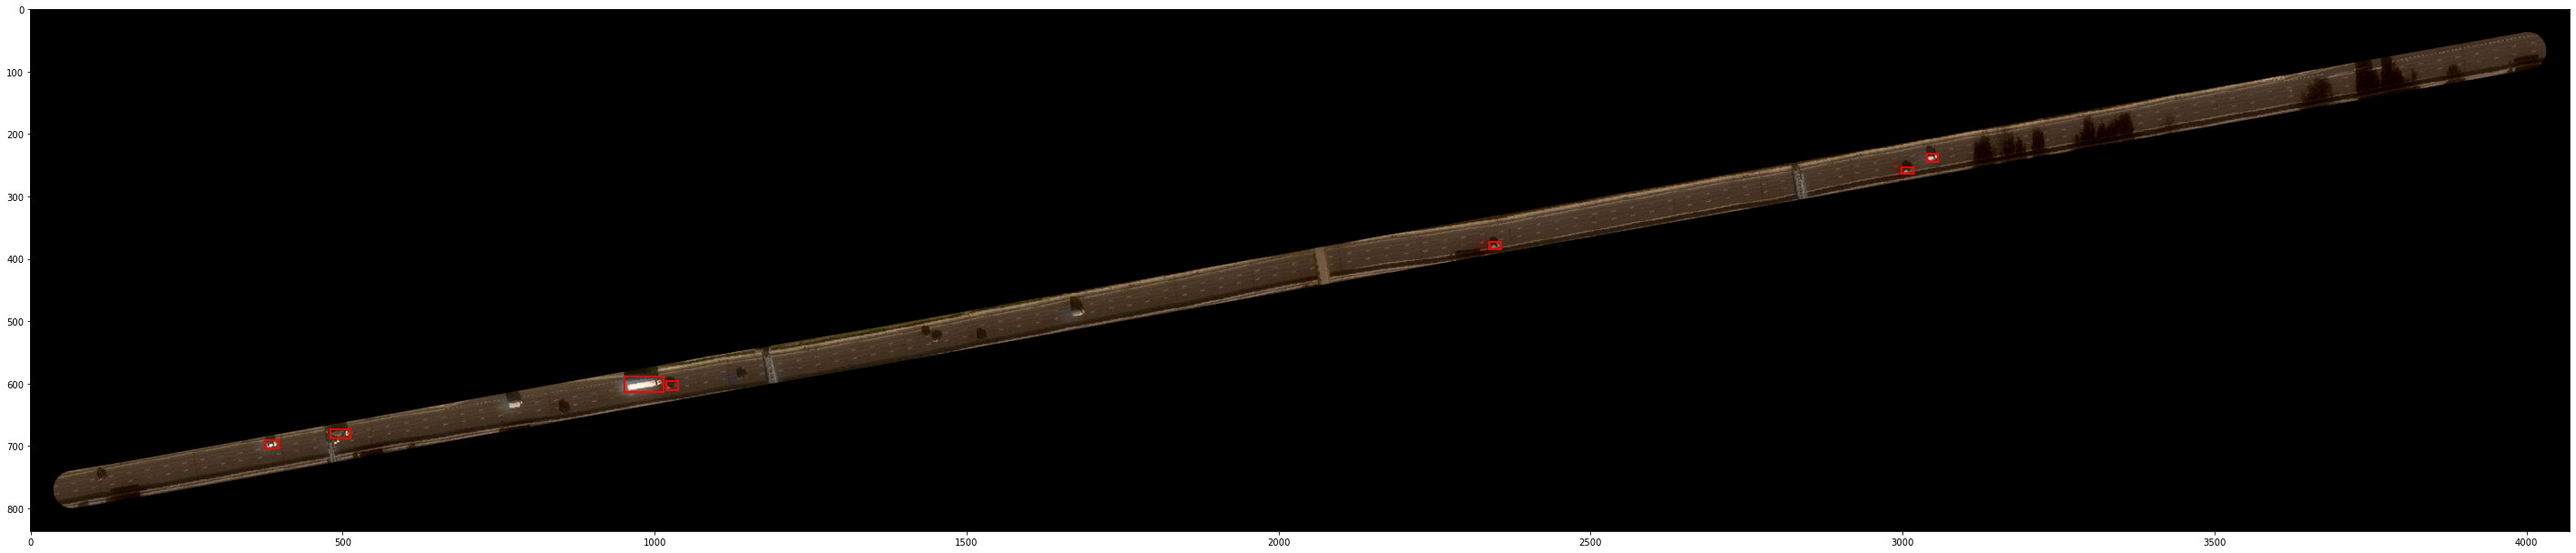

In [59]:
# Create figure and axes
a= 50
fig, ax = plt.subplots(figsize=(a,a))
# Display the image
ax.imshow(im)

for box in bboxes:
    if box.score.value >= 0.2:
        x,y,w,h = box.bbox.to_coco_bbox()
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

plt.show()